<div align="center">
<a href="https://ibb.co/Jdc4CFf"><img src="https://i.ibb.co/PYrntz7/banner-coronavirus-0.webp" alt="banner-coronavirus-0" border="0"></a>
</div>

# Project Content
* 1. [Introduction](#1)
        * 1.1 [What is COVID19?](#1.1)
* 2. [First Organization](#2)
        * 2.1 [Import Libraries](#2.1)
        * 2.2 [Import Dataset](#2.2)
        * 2.3 [Fist Analysis Of Dataset](#2.3)
            * 2.3.1 [Analysis Output](#2.3.1)
        * 2.4 [Preliminary Statistical Analysis](#2.4)
            * 2.4.1 [Analysis Output](#2.4.1)
        * 2.5 [Correcting Date Variable Data Type](#2.5)
        * 2.6 [Check Unique Values](#2.6)
* 3. [Exploratory Data Analysis](#3)
        * 3.1 [Check the number of Confirmed, Deaths and Recovered cases in each Region](#3.1)
            * 3.1.1 [Sort by number of Confirmed Cases](#3.1.1)
        * 3.2 [Total Confirmed Cases](#3.2)
        * 3.3 [Death Cases By Region](#3.3)
        * 3.4 [Total Confirmed Cases by State and Date](#3.4)
        * 3.5 [Average Recovered Cases by Region](#3.5)
        * 3.6 [Distribution of Confirmed, Deaths, and Recovered Cases by Region](#3.6)
        * 3.7 [Boxplot](#3.7)
        * 3.8 [Distribution Using kdeplot](#3.8)
            * 3.8.1 [Analysis Output](#3.8.1)
* 4. [Transformation](#4)
        * 4.1 [Logarithmic Transoformation for Numeric Features](#4.1)
        * 4.2 [Check Outliers](#4.2)
        * 4.3 [Check Distribution](#4.3)
* 5. [Relationship Between Variables](#5)

# 1. Introduction <a id=1></a>

## 1.1 What is COVID-19? <a id=1.1></a>

Coronavirus disease 2019 (COVID-19) is a contagious disease caused by the coronavirus SARS-CoV-2. The first known case was identified in Wuhan, China, in December 2019. The disease quickly spread worldwide, resulting in the COVID-19 pandemic.

The symptoms of COVID‑19 are variable but often include feve8] fatigue, cough, breathing difficulties, loss of smell, and loss of tast ] Symptoms may begin one to fourteen days after exposure to the virus. At least a third of people who are infected do not develop noticeable symptom3] Of those who develop symptoms noticeable enough to be classified as patients, most (81%) develop mild to moderate symptoms (up to mild pneumonia), while 14% develop severe symptoms (dyspnea, hypoxia, or more than 50% lung involvement on imaging), and 5% develop critical symptoms (respiratory failure, shock, or multiorgan dysfunction4] Older people are at a higher risk of developing severe symptoms. Some complications result in death. Some people continue to experience a range of effects (long COVID) for months or years after infection, and damage to organs has been observe] Multi-year studies are underway to further investigate the long-term effects of the diseas6]

COVID‑19 transmission occurs when infectious particles are breathed in or come into contact with the eyes, nose, or mouth. The risk is highest when people are in close proximity, but small airborne particles containing the virus can remain suspended in the air and travel over longer distances, particularly indoors. Transmission can also occur when people touch their eyes, nose or mouth after touching surfaces or objects that have been contaminated by the virus. People remain contagious for up to 20 days and can spread the virus even if they do not develop sympt

[Source](https://en.wikipedia.org/wiki/COVID-19)oms.

# 2. First Organization <a id=2></a>

## 2.1 Import Libraries <a id=2.1></a>

In [221]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings("ignore")

## 2.2 Import Dataset <a id=2.2></a>

In [222]:
# import dataset 
df = pd.read_csv('__ 004 Covid-19-data.csv')

## 2.3 First Analysis of Dataset <a id=2.3></a>

In [223]:
df.head()

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,NaN,Afghanistan,1939,60,252
1,4/29/2020,NaN,Albania,766,30,455
2,4/29/2020,NaN,Algeria,3848,444,1702
3,4/29/2020,NaN,Andorra,743,42,423
4,4/29/2020,NaN,Angola,27,2,7


In [224]:
# check columns and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 321 entries, 0 to 320
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       321 non-null    object
 1   State      140 non-null    object
 2   Region     321 non-null    object
 3   Confirmed  321 non-null    int64 
 4   Deaths     321 non-null    int64 
 5   Recovered  321 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 15.2+ KB


In [225]:
# check values of each columns
df.count()
# there are NaN values on State column

Date         321
State        140
Region       321
Confirmed    321
Deaths       321
Recovered    321
dtype: int64

In [226]:
# check sum of NaN values of each column
df.isnull().sum()

Date           0
State        181
Region         0
Confirmed      0
Deaths         0
Recovered      0
dtype: int64

### 2.3.1 Analysis Output <a id=2.3.1></a>

1
2. There are 321 entries in the datase2.
3. The columns include:
   - Date: Date of the recorded data.
   - State: State where the data was recorded. However, there are missing values in this column (only 140 non-null entries).
   - Region: Region within the state where the data was recorded.
   - Confirmed: Number of confirmed COVID-19 cases.
   - Deaths: Number of deaths due to COVID-19.
   - Recovered: Number of recovered COVID-39 cases.
4. The 'Date' column is of object data type, indicating it likely needs to be converted to a datetime format for proper time-series4analysis.
5. The 'Confirmed', 'Deaths', and 'Recovered' columns are of integer data type, suggesting they contain 5ount data.
6. There are regions recorded for which the states are not specified. This could affect the analysis, especially if state-level analysis 6s required.
7. The dataset provides a snapshot of COVID-19 cases, deaths, and recoveries in various regions over time, allowing for trend analysis and understanding the impact of the pandemic in different areas.

## 2.4 Preliminary Statistical Analysis <a id=2.4></a>

In [227]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Confirmed,321.0,9949.800623,31923.853086,0.0,104.0,653.0,4655.0,299691.0
Deaths,321.0,709.152648,3236.162817,0.0,2.0,12.0,144.0,27682.0
Recovered,321.0,3030.277259,14364.870365,0.0,2.0,73.0,587.0,132929.0


### 2.4.1 Analysis Output <a id=2.4.1></a>


- **Count**: Indicates the number of non-null entries for each variable. There are 321 entries for each variable, suggesting no missing values.
- **Mean**: Represents the average value for each variable across all entries. On average, there are approximately 9949 confirmed cases, 709 deaths, and 3030 recoveries.
- **Standard Deviation (std)**: Measures the dispersion or spread of the data around the mean. It indicates how much the values deviate from the mean. For instance, the standard deviation for confirmed cases is approximately 31923, deaths is 3236, and recoveries is 14364.
- **Min**: Denotes the minimum value observed for each variable. In this dataset, the minimum values for confirmed cases, deaths, and recoveries are all 0, indicating regions where no cases have been recorded.
- **25th Percentile (25%)**: Represents the value below which 25% of the data falls. For example, at the 25th percentile, there are 104 confirmed cases, 2 deaths, and 2 recoveries.
- **Median (50%)**: Represents the middle value of the dataset. It divides the data into two equal halves. For instance, the median for confirmed cases is 653, deaths is 12, and recoveries is 73.
- **75th Percentile (75%)**: Represents the value below which 75% of the data falls. For example, at the 75th percentile, there are 4655 confirmed cases, 144 deaths, and 587 recoveries.
- **Max**: Denotes the maximum value observed for each variable. The maximum values for confirmed cases, deaths, and recoveries are 299691, 27682, and 132929, respectively.

## 2.5 Correcting Date Variable Data Type <a id=2.5></a>

In [228]:
# This variable shows date and currently it has object dtype, 
# we will use pd.to_datetime method to change its data type to datetime
df['Date'] = pd.to_datetime(df['Date'])

In [229]:
# Rechcek dtype
df.dtypes

Date         datetime64[ns]
State                object
Region               object
Confirmed             int64
Deaths                int64
Recovered             int64
dtype: object

## 2.6 Check Unique Values <a id=2.6></a>

In [230]:
pd.DataFrame(df.nunique(), columns=["Number Of Unique Values"])

,Number Of Unique Values
Date,1
State,137
Region,187
Confirmed,282
Deaths,142
Recovered,195


In [231]:
df['Date'].value_counts()

Date
2020-04-29    321
Name: count, dtype: int64

**As per above tables we can see that the data provided by this dataset is only related to one date which is `2020-04-29`**

# 3. Exploratory Data Analysis <a id=3></a>

## 3.1 Check the number of Confirmed, Deaths and Recovered cases in each Region <a id=3.1></a>

In [232]:
sum_information = df.groupby('Region')[['Confirmed', 'Deaths', 'Recovered']].sum()
sum_information

,Confirmed,Deaths,Recovered
Region,,,
Afghanistan,1939,60,252
Albania,766,30,455
Algeria,3848,444,1702
Andorra,743,42,423
Angola,27,2,7
...,...,...,...
West Bank and Gaza,344,2,71
Western Sahara,6,0,5
Yemen,6,0,1


In [233]:
# check first 20 region
sum_information.head(10)

,Confirmed,Deaths,Recovered
Region,,,
Afghanistan,1939,60,252
Albania,766,30,455
Algeria,3848,444,1702
Andorra,743,42,423
Angola,27,2,7
Antigua and Barbuda,24,3,11
Argentina,4285,214,1192
Armenia,1932,30,900
Australia,6752,91,5715


### 3.1.1 Sort by number of Confirmed Cases<a id=3.1.1></a>

In [234]:
# sort by number of Confirmed
sum_information['Confirmed'].sort_values(ascending = False).to_frame()

,Confirmed
Region,
US,1039909
Spain,236899
Italy,203591
France,166543
UK,166441
...,...
Sao Tome and Principe,8
Papua New Guinea,8
Bhutan,7


## 3.2 Total Confirmed Cases <a id=3.2></a>

In [235]:
confirmed_by_date = df.groupby('Date')['Confirmed'].sum()
confirmed_by_date

Date
2020-04-29    3193886
Name: Confirmed, dtype: int64

## 3.3 Death Cases By Region

In [236]:
deaths_by_region = df.groupby('Region')['Deaths'].sum().sort_values(ascending=False).to_frame()
deaths_by_region

,Deaths
Region,
US,60967
Italy,27682
UK,26166
Spain,24275
France,24121
...,...
Holy See,0
Grenada,0
South Sudan,0


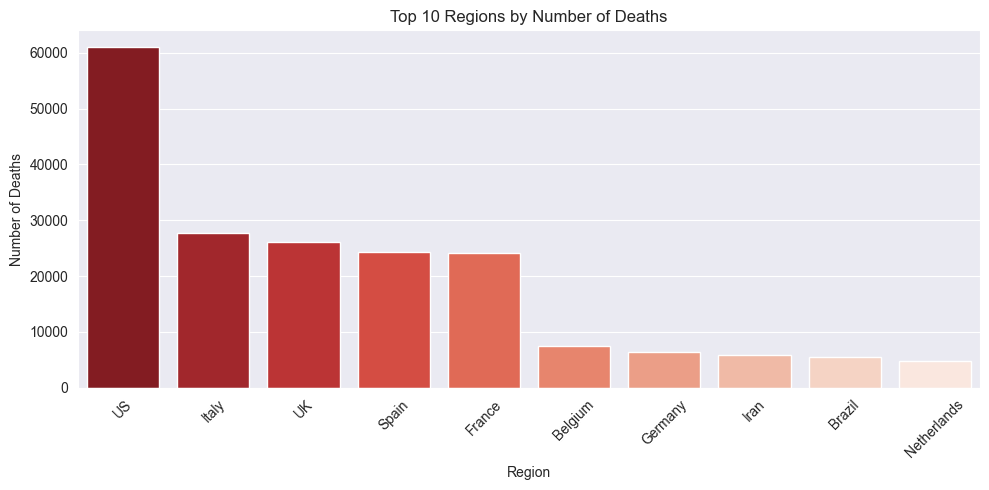

In [237]:
# Selecting the top 10 regions
top_10_regions = deaths_by_region.head(10)

# Plotting the top 10 regions
plt.figure(figsize=(10, 5))
sns.barplot(data=top_10_regions, x=top_10_regions.index, y='Deaths', palette='Reds_r')
plt.title('Top 10 Regions by Number of Deaths')
plt.xlabel('Region')
plt.ylabel('Number of Deaths')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 3.4 Total Confirmed Cases by State and Date <a id=3.4><a/>

In [238]:
confirmed_by_state_date = df.pivot_table(index='State', columns='Date', values='Confirmed', aggfunc='sum')
confirmed_by_state_date

Date,2020-04-29
State,
Alabama,6912
Alaska,355
Alberta,5165
Anguilla,3
Anhui,991
...,...
Wyoming,545
Xinjiang,76
Yukon,11


## 3.5 Average Recovered Cases by Region <a id=3.5><a/>

In [239]:
average_recovered_by_region = df.pivot_table(index='Region', values='Recovered', aggfunc='mean')
average_recovered_by_region

,Recovered
Region,
Afghanistan,252.0
Albania,455.0
Algeria,1702.0
Andorra,423.0
Angola,7.0
...,...
West Bank and Gaza,71.0
Western Sahara,5.0
Yemen,1.0


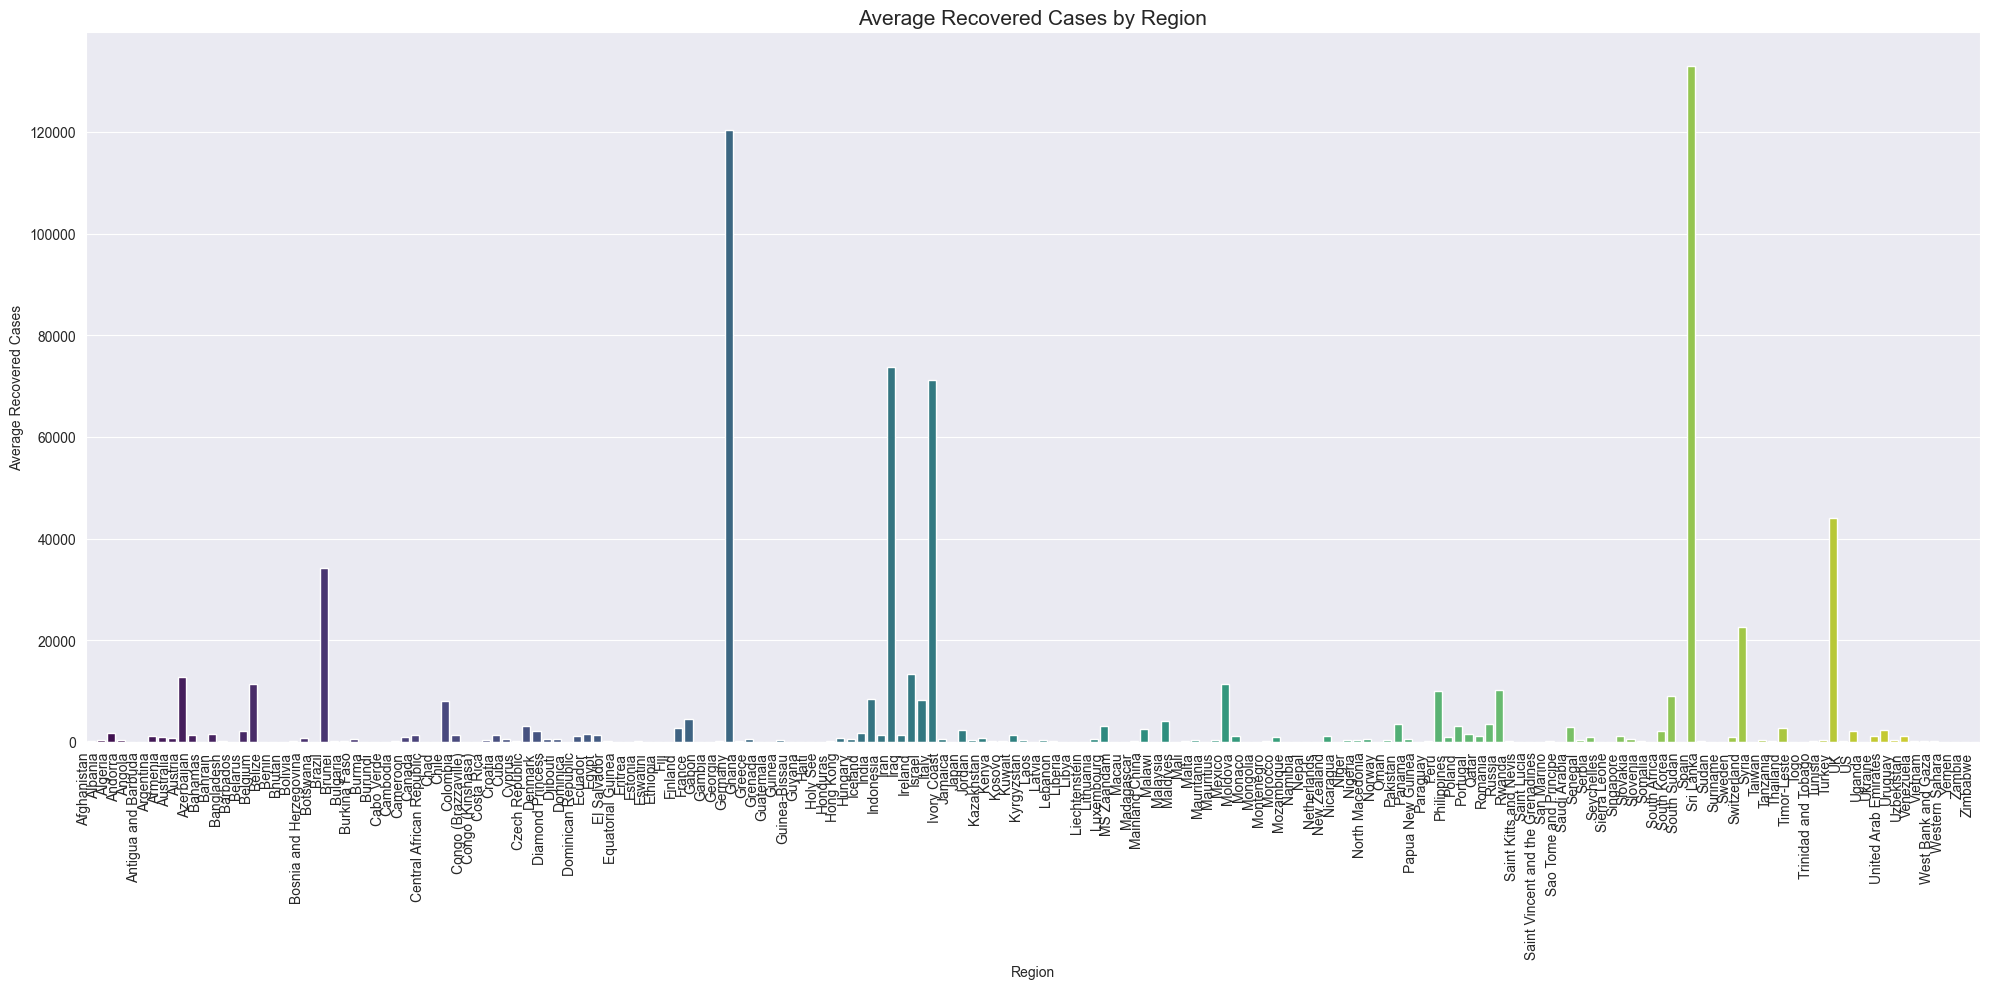

In [240]:
plt.figure(figsize=(20, 10))
sns.set_style('darkgrid')
sns.barplot(x=average_recovered_by_region.index, y=average_recovered_by_region['Recovered'], palette='viridis')
plt.title('Average Recovered Cases by Region', fontsize=15)
plt.xlabel('Region')
plt.ylabel('Average Recovered Cases')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

## 3.6 Distribution of Confirmed, Deaths, and Recovered Cases by Region <a id=3.6></a>

<Figure size 1000x600 with 0 Axes>

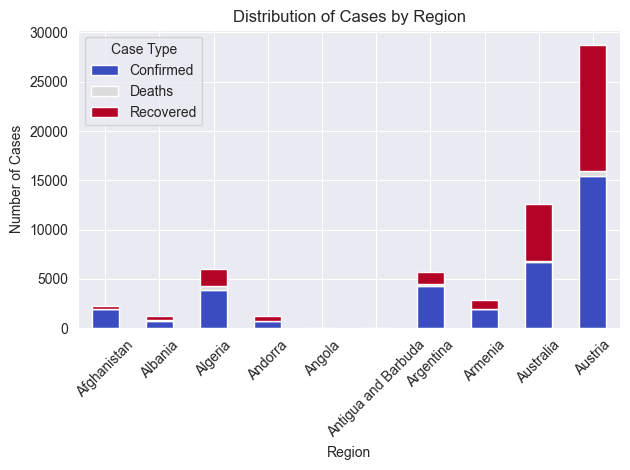

In [241]:
region_data = df.groupby('Region')[['Confirmed', 'Deaths', 'Recovered']].sum().head(10)

plt.figure(figsize=(10, 6))
region_data.plot(kind='bar', stacked=True, colormap='coolwarm')
plt.title('Distribution of Cases by Region')
plt.xlabel('Region')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)
plt.legend(title='Case Type')
plt.tight_layout()
plt.show()


## 3.7 Boxplot <a id=3.7></a>

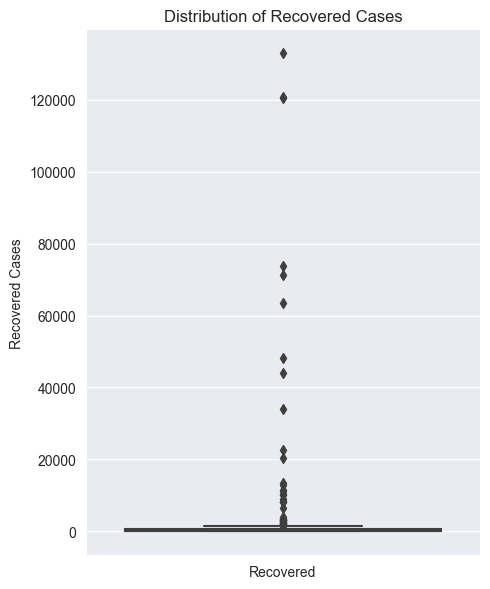

In [242]:
plt.figure(figsize=(5, 6))
sns.boxplot(data=df[['Recovered']])
plt.title('Distribution of Recovered Cases')
plt.ylabel('Recovered Cases')
plt.tight_layout()
plt.show()

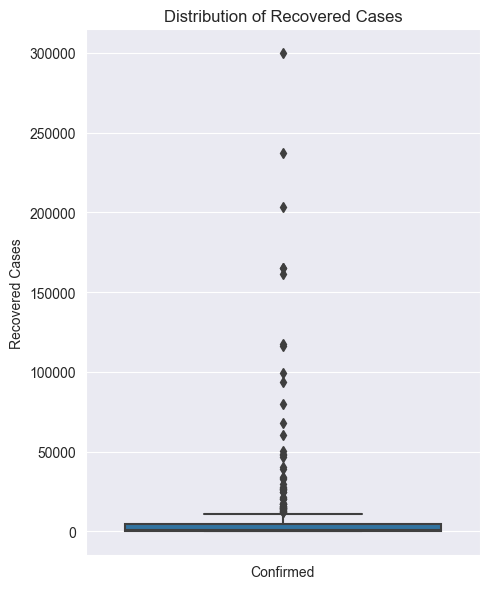

In [243]:
plt.figure(figsize=(5, 6))
sns.boxplot(data=df[['Confirmed']])
plt.title('Distribution of Recovered Cases')
plt.ylabel('Recovered Cases')
plt.tight_layout()
plt.show()

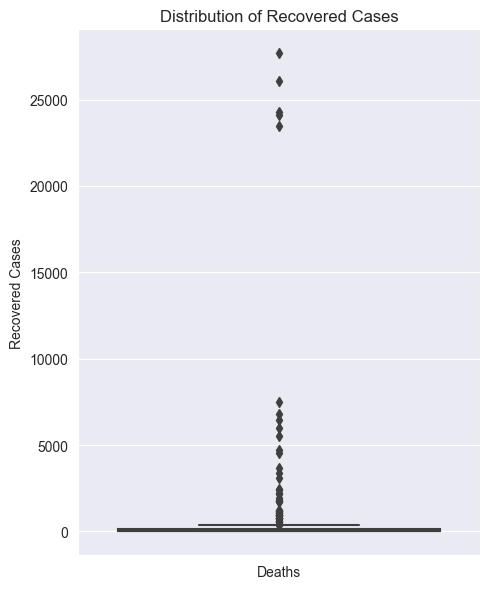

In [244]:
plt.figure(figsize=(5, 6))
sns.boxplot(data=df[['Deaths']])
plt.title('Distribution of Recovered Cases')
plt.ylabel('Recovered Cases')
plt.tight_layout()
plt.show()

## 3.8 Distributions Using kdeplot <a id=3.8></a>

In [245]:
def distribution(col):
    mean = df[col].mean()
    median = df[col].median()
    # Add mean and median tp plot
    plt.figure(figsize=(5, 5))
    sns.kdeplot(df[col], color='darkblue')
    plt.axvline(mean, color='red', linestyle='dashed', linewidth=1, label='Mean')
    plt.axvline(median, color='green', linestyle='dashed', linewidth=1, label='Median')
    
    plt.title(f"Distribuition of {col}")
    plt.xlabel(f"{col}")
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()

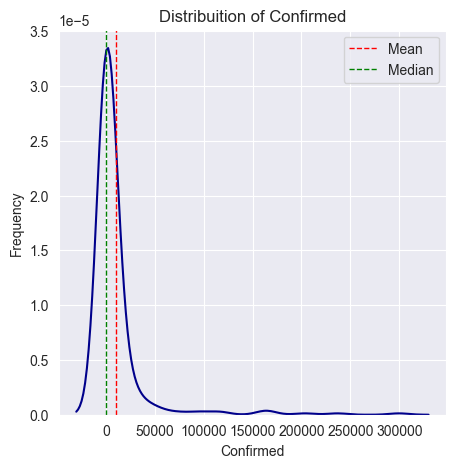

In [246]:
distribution('Confirmed')

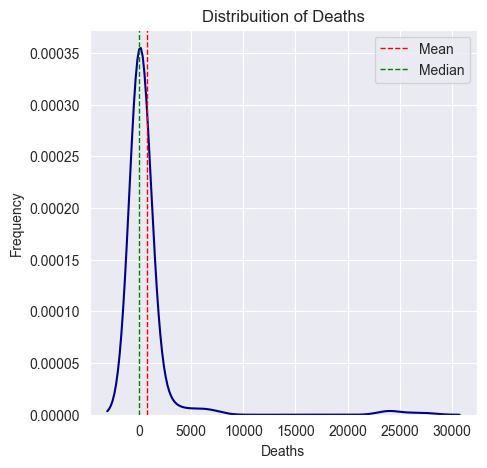

In [247]:
distribution('Deaths')

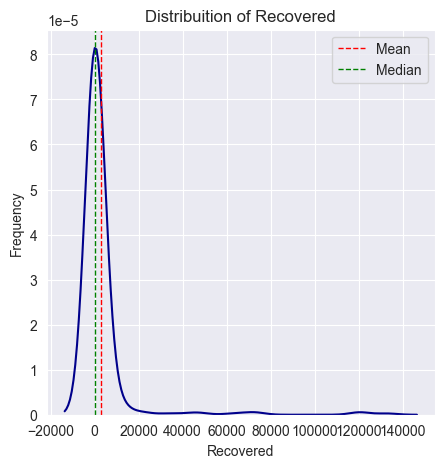

In [248]:
distribution('Recovered')

## 3.9 Analysis Output <a id=3.9><a/>

**Outliers**:
* As per boxplot we can easily see that all numeric values contains outliers.

**Distributions**:
* According to kdeplot it is shown that all three numeric values are slightly right skewed.

**Solution** : As this dataset does not have enoudg records , i will use logarithmic transformation to handle both Skewness and Outliers.

# 4. Transformation <a id=4></a>

## 4.1 Logarithmic Transoformation for Numeric Features <a id=4.1></a>

In [249]:
def log(col):
    # df[col] = np.log(df[col])
    df[col] = np.log1p(df[col])

In [250]:
numeric_var = ['Confirmed', 'Recovered', 'Deaths']
for col in numeric_var:
    log(col)

## 4.2 Check Outliers <a id=4.2></a>

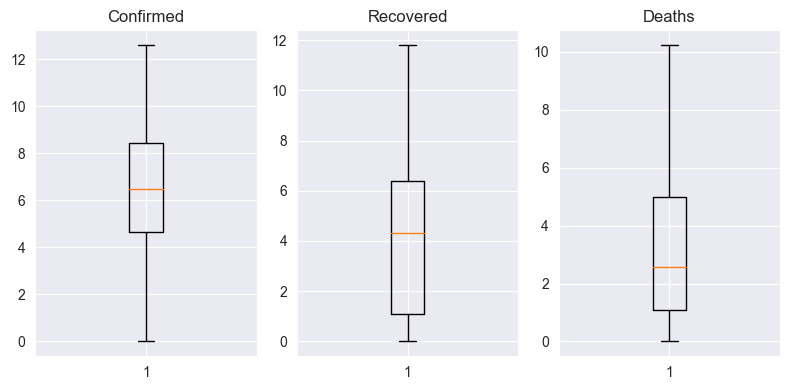

In [251]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(8, 4))

ax1.boxplot(df["Confirmed"])
ax1.set_title("Confirmed")

ax2.boxplot(df["Recovered"])
ax2.set_title("Recovered")

ax3.boxplot(df["Deaths"])
ax3.set_title("Deaths")


plt.tight_layout()
plt.show()


## 4.3 Check Distribution <a id=4.3></a>

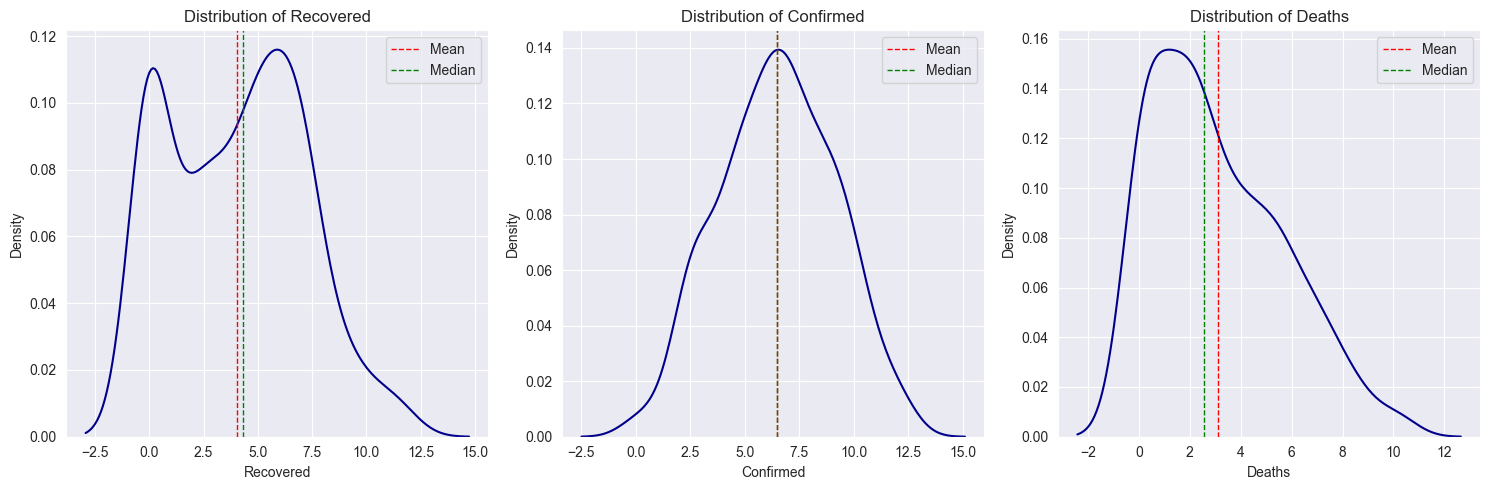

In [252]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for i, col in enumerate(['Recovered', 'Confirmed', 'Deaths']):
    mean = df[col].mean()
    median = df[col].median()
    
    sns.kdeplot(df[col], color='darkblue', ax=axs[i])
    axs[i].axvline(mean, color='red', linestyle='dashed', linewidth=1, label='Mean')
    axs[i].axvline(median, color='green', linestyle='dashed', linewidth=1, label='Median')
    
    axs[i].set_title(f"Distribution of {col}")
    axs[i].set_xlabel(f"{col}")
    axs[i].set_ylabel("Density")
    axs[i].legend()

plt.tight_layout()
plt.show()

## 5. Relationship Between Variables <a id=5></a>

<AxesSubplot:>

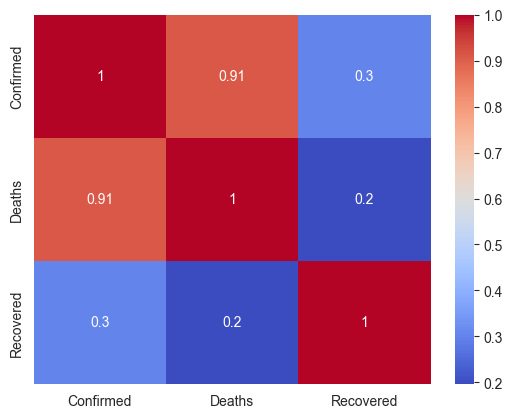

In [278]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')